In [1]:
#28/8/24 Analyses padel Results

import pandas as pd
import numpy as np

In [2]:
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/PaDEL/data/padelNNout.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))

In [3]:
results

[0.3612083148139321,
 0.16857418082541983,
 0.5052988306208857,
 0.28311496464321817,
 0.37296802081999014,
 0.454629762633763,
 0.0,
 0.0,
 0.3560565754813661,
 0.3250689462284642,
 0.36864040596901637,
 0.305007662386757,
 0.0,
 0.4964117366692912,
 0.0880237696271323,
 0.0,
 0.5325117478349791,
 0.2836839151056609,
 0.2140542658461513,
 0.38181060879030126,
 0.5426095162342934,
 0.45406068756763107]

In [4]:
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/PaDEL/data/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

In [5]:
temp = datasets[0]
datasets[0] = datasets[1]
datasets[1] = temp

In [6]:
namelist

['padel_rf.csv', 'padel_svm.csv', 'padel_knn.csv']

In [7]:
index = ['SVM', 'RF', 'KNN', 'NN']

In [8]:
mcclist = []
for data in datasets:
    mcclist.append(data['MCC'].values.tolist())
mcclist.append(results)

In [9]:
datalist = datasets[0]['Dataset'].values
temp = []
for item in datalist:
    temp.append(item[:-4])
datalist = temp

In [10]:
for item in mcclist:
    print(len(item))

22
22
22
22


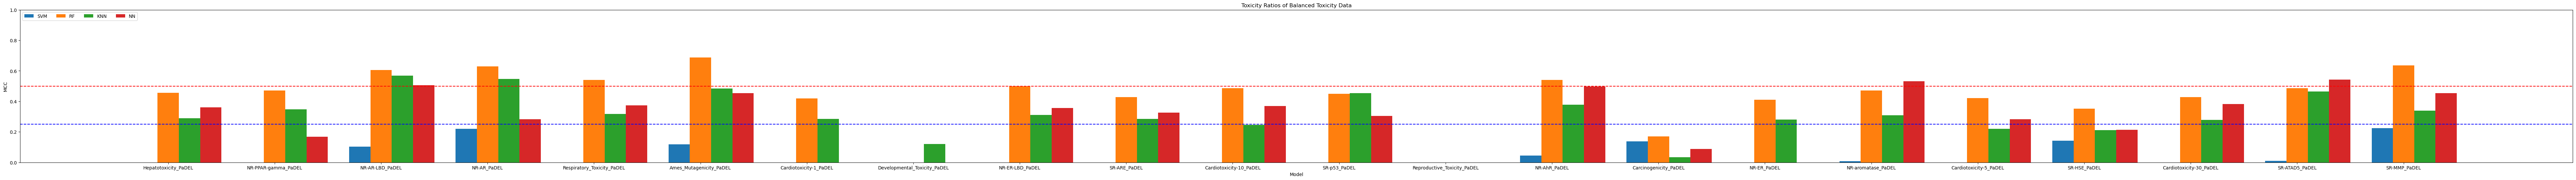

In [11]:
import matplotlib.pyplot as plt
data = mcclist

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(datalist))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(100, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Balanced Toxicity Data')
ax.set_xticks(x + width, datalist)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [12]:
import statistics
meanvals = []
loops = 0
for val in mcclist[0]:
    currdata = []
    for item in mcclist:
        currdata.append(item[loops])
    
    mean = statistics.mean(currdata)
    meanvals.append(mean)
    loops +=1

In [13]:
loops = 0
for val in meanvals:
    print(datalist[loops], ':', val)
    
    loops += 1

Hepatotoxicity_PaDEL : 0.2660404472660088
NR-PPAR-gamma_PaDEL : 0.24370493205357793
NR-AR-LBD_PaDEL : 0.4454036496819369
NR-AR_PaDEL : 0.41935516100999193
Respiratory_Toxicity_PaDEL : 0.307613746949414
Ames_Mutagenicity_PaDEL : 0.4362631486513494
Cardiotoxicity-1_PaDEL : 0.17606983955460256
Developmental_Toxicity_PaDEL : 0.005483213409646501
NR-ER-LBD_PaDEL : 0.28041990960364366
SR-ARE_PaDEL : 0.2509313567582951
Cardiotoxicity-10_PaDEL : 0.26616351346586214
SR-p53_PaDEL : 0.3012708243510892
Reproductive_Toxicity_PaDEL : -0.18954972243679027
NR-AhR_PaDEL : 0.36494104546262357
Carcinogenicity_PaDEL : 0.10737821387848075
NR-ER_PaDEL : 0.16177732380852355
NR-aromatase_PaDEL : 0.33043322631663036
Cardiotoxicity-5_PaDEL : 0.23107993690228906
SR-HSE_PaDEL : 0.2299639774205933
Cardiotoxicity-30_PaDEL : 0.2721603778056957
SR-ATAD5_PaDEL : 0.37559307666138575
SR-MMP_PaDEL : 0.4126970488277279


In [14]:
datalist

['Hepatotoxicity_PaDEL',
 'NR-PPAR-gamma_PaDEL',
 'NR-AR-LBD_PaDEL',
 'NR-AR_PaDEL',
 'Respiratory_Toxicity_PaDEL',
 'Ames_Mutagenicity_PaDEL',
 'Cardiotoxicity-1_PaDEL',
 'Developmental_Toxicity_PaDEL',
 'NR-ER-LBD_PaDEL',
 'SR-ARE_PaDEL',
 'Cardiotoxicity-10_PaDEL',
 'SR-p53_PaDEL',
 'Reproductive_Toxicity_PaDEL',
 'NR-AhR_PaDEL',
 'Carcinogenicity_PaDEL',
 'NR-ER_PaDEL',
 'NR-aromatase_PaDEL',
 'Cardiotoxicity-5_PaDEL',
 'SR-HSE_PaDEL',
 'Cardiotoxicity-30_PaDEL',
 'SR-ATAD5_PaDEL',
 'SR-MMP_PaDEL']

In [15]:
len(datalist )

22

In [16]:
endoindex = [1, 2, 3, 8, 9, 11, 13, 15, 16, 18, 20, 21]
cardioindex = [6, 17, 10, 19]
devrepindex = [7, 12]
mutacarcheparespindex = [5, 14, 0, 4]

In [17]:
endovals = [[], [], [], []]
endonames = []
for val in endoindex:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])

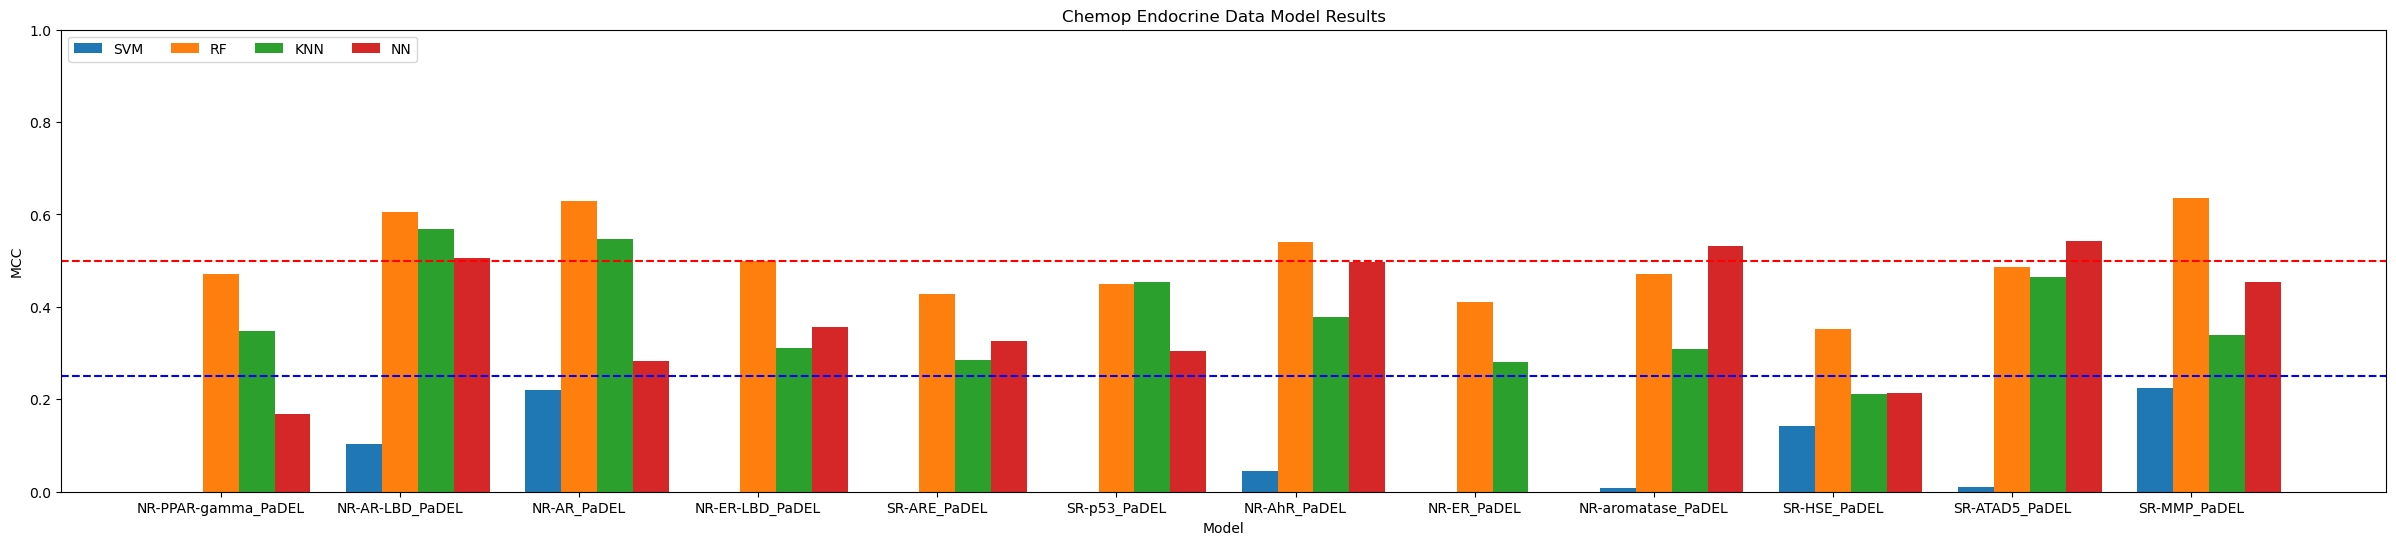

In [18]:
import matplotlib.pyplot as plt
data = endovals

x = np.arange(len(endoindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(30, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemop Endocrine Data Model Results')
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

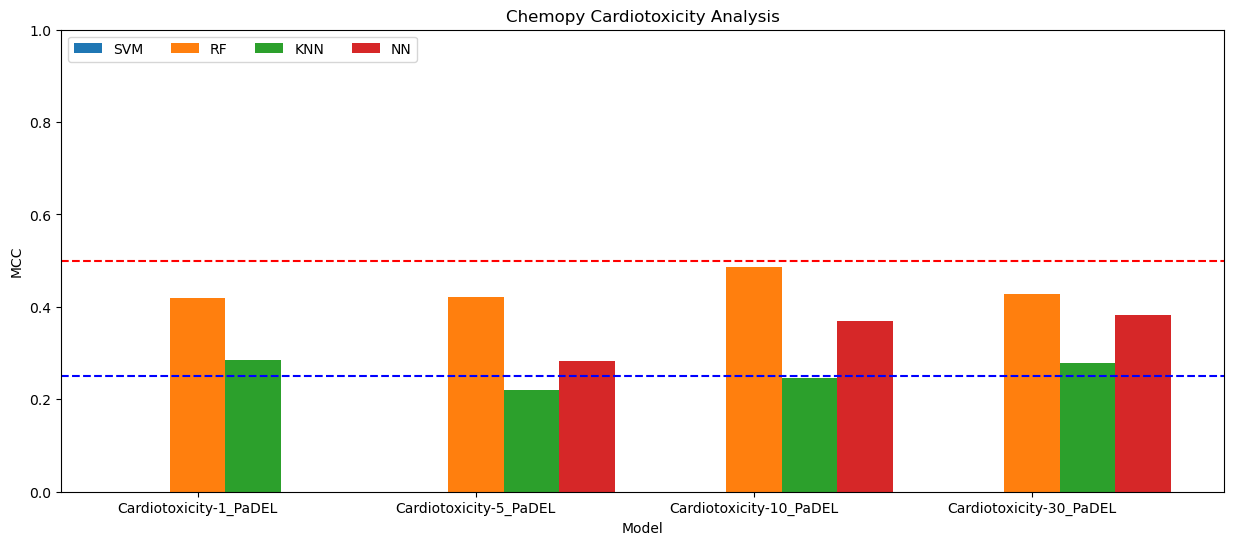

In [19]:
cardiovals = [[], [], [], []]
cardionames = []
for val in cardioindex:
    cardiovals[0].append(mcclist[0][val])
    cardiovals[1].append(mcclist[1][val])
    cardiovals[2].append(mcclist[2][val])
    cardiovals[3].append(mcclist[3][val])
    cardionames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = cardiovals

x = np.arange(len(cardioindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Cardiotoxicity Analysis')
ax.set_xticks(x + width, cardionames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

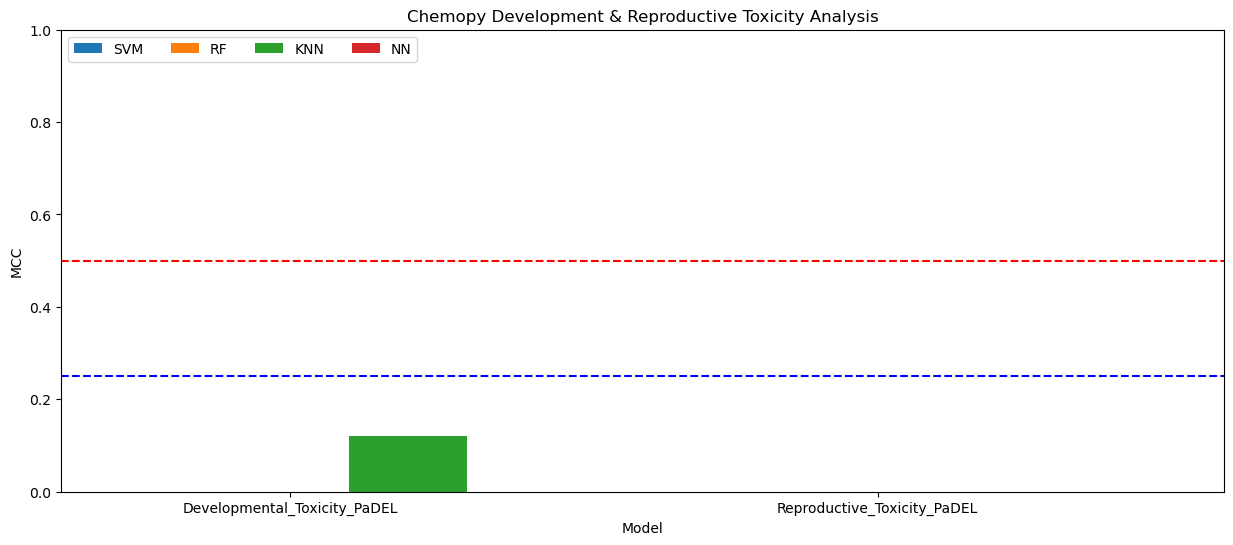

In [20]:
devrepvals = [[], [], [], []]
devrepnames = []
for val in devrepindex:
    devrepvals[0].append(mcclist[0][val])
    devrepvals[1].append(mcclist[1][val])
    devrepvals[2].append(mcclist[2][val])
    devrepvals[3].append(mcclist[3][val])
    devrepnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = devrepvals

x = np.arange(len(devrepindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Development & Reproductive Toxicity Analysis')
ax.set_xticks(x + width, devrepnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')


plt.show()

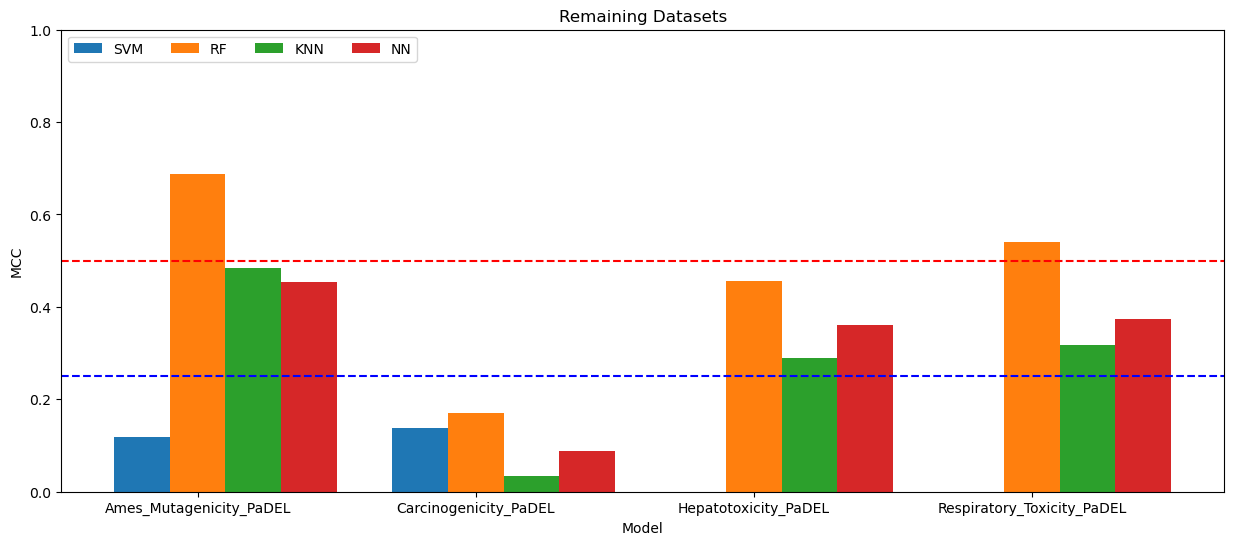

In [21]:
mutacarcheparespvals = [[], [], [], []]
mutacarcheparespnames = []
for val in mutacarcheparespindex:
    mutacarcheparespvals[0].append(mcclist[0][val])
    mutacarcheparespvals[1].append(mcclist[1][val])
    mutacarcheparespvals[2].append(mcclist[2][val])
    mutacarcheparespvals[3].append(mcclist[3][val])
    mutacarcheparespnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = mutacarcheparespvals

x = np.arange(len(mutacarcheparespindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Remaining Datasets')
ax.set_xticks(x + width, mutacarcheparespnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()